# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Checking single City

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1674070971,
    "id": 2643743,
    "main": {
        "feels_like": 1.71,
        "humidity": 88,
        "pressure": 1001,
        "temp": 1.71,
        "temp_max": 3.23,
        "temp_min": -0.25
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1674028620,
        "sunset": 1674059049,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 261,
        "gust": 1.79,
        "speed": 0.89
    }
}


In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lon"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | broken hill
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ribas do rio pardo
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | balkanabat
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | aras
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | labutta
City not found. Skipping...
Processing Record 17 of Set 1 | marsh harbour
Processing Record 18 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | krasnoselkup
Processing Record 21 of Se

Processing Record 38 of Set 4 | bara
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | barcelos
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | boa vista
Processing Record 44 of Set 4 | huilong
Processing Record 45 of Set 4 | omsukchan
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | sherbakul
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | anloga
Processing Record 0 of Set 5 | airai
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | morehead
Processing Record 5 of Set 5 | ladario
Processing Record 6 of Set 5 | paita
Processing Record 7 of Set 5 | viedma
Processing Record 8 of Set 5 | thilogne
City not found. Skipping...
Processing Record 9 of Set 5 | neiafu
Processing Record 10 of Set 5 | port lincoln
Processing Record 11 of Set 5 | clyde river

Processing Record 28 of Set 8 | charleroi
Processing Record 29 of Set 8 | victoria
Processing Record 30 of Set 8 | verkhnyaya inta
Processing Record 31 of Set 8 | souillac
Processing Record 32 of Set 8 | clearwater
Processing Record 33 of Set 8 | kaupanger
Processing Record 34 of Set 8 | cienfuegos
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | tonj
Processing Record 37 of Set 8 | yazd
Processing Record 38 of Set 8 | asau
Processing Record 39 of Set 8 | wawa
Processing Record 40 of Set 8 | creel
Processing Record 41 of Set 8 | ano kastritsion
Processing Record 42 of Set 8 | cazaje
City not found. Skipping...
Processing Record 43 of Set 8 | gobabis
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | sinkat
City not found. Skipping...
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | ambilobe
Processing Record 48 of Set 8 | vianopolis
Processing Record 49 of Set 8 | sao filipe
Processing Record 0 of Set 9 | soyo
Pr

Processing Record 16 of Set 12 | valer
Processing Record 17 of Set 12 | sandy bay
Processing Record 18 of Set 12 | clinton
Processing Record 19 of Set 12 | pisco
Processing Record 20 of Set 12 | williston
Processing Record 21 of Set 12 | cuite
Processing Record 22 of Set 12 | port augusta
Processing Record 23 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 12 | ituacu
Processing Record 25 of Set 12 | edd
Processing Record 26 of Set 12 | ler
Processing Record 27 of Set 12 | deputatskiy
Processing Record 28 of Set 12 | coshocton
Processing Record 29 of Set 12 | shafranovo
Processing Record 30 of Set 12 | gay
Processing Record 31 of Set 12 | quartucciu
Processing Record 32 of Set 12 | udachnyy
Processing Record 33 of Set 12 | bolu
Processing Record 34 of Set 12 | saravena
Processing Record 35 of Set 12 | linkoping
Processing Record 36 of Set 12 | marshall
Processing Record 37 of Set 12 | goundi
Processing Record 38 of Set 12 | warwick
Processing Record 39 of Set 12 | imp

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,140.8333,35.7333,4.22,61,100,7.95,JP,1674071039
1,broken hill,141.4333,-31.9500,13.63,68,11,9.60,AU,1674071057
2,albany,-73.9662,42.6001,5.87,83,100,1.34,US,1674071568
3,ushuaia,-68.3000,-54.8000,16.81,51,75,7.72,AR,1674071504
4,ribas do rio pardo,-53.7592,-20.4431,28.87,60,98,1.60,BR,1674071568


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,140.8333,35.7333,4.22,61,100,7.95,JP,1674071039
1,broken hill,141.4333,-31.9500,13.63,68,11,9.60,AU,1674071057
2,albany,-73.9662,42.6001,5.87,83,100,1.34,US,1674071568
3,ushuaia,-68.3000,-54.8000,16.81,51,75,7.72,AR,1674071504
4,ribas do rio pardo,-53.7592,-20.4431,28.87,60,98,1.60,BR,1674071568


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

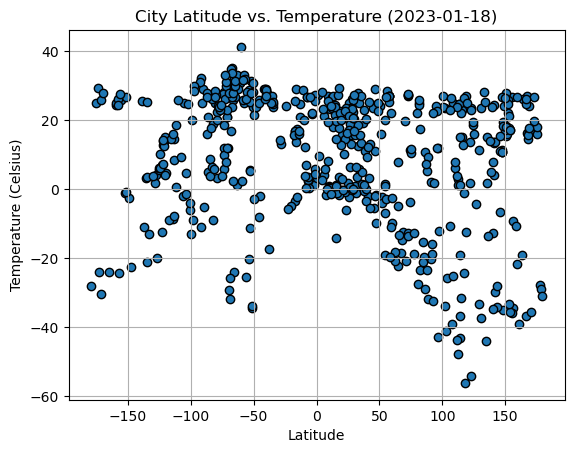

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

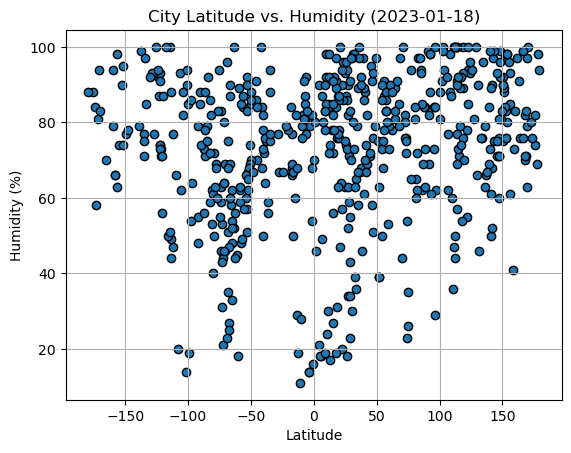

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

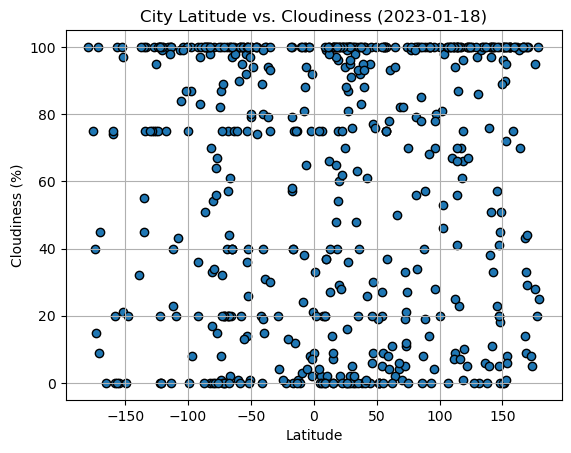

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

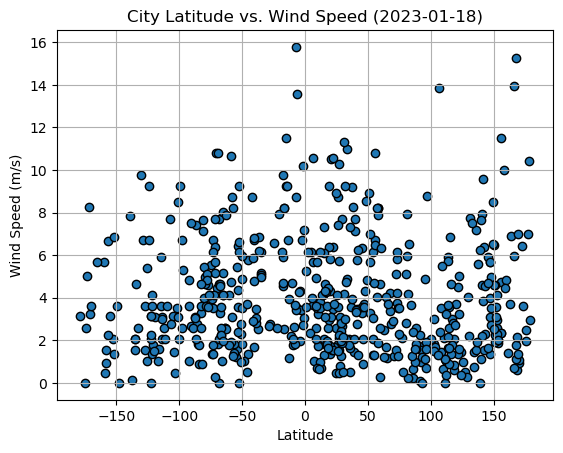

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel(title)
    plt.xlabel("Latitude")
    plt.annotate(line_eq,(text_coordinates),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,140.8333,35.7333,4.22,61,100,7.95,JP,1674071039
1,broken hill,141.4333,-31.9500,13.63,68,11,9.60,AU,1674071057
5,naze,129.4833,28.3667,11.51,66,97,4.03,JP,1674071569
6,balkanabat,54.3671,39.5108,1.68,50,27,1.30,TM,1674071570
7,hithadhoo,73.0833,-0.6000,27.51,72,11,3.74,MV,1674071570


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,-73.9662,42.6001,5.87,83,100,1.34,US,1674071568
3,ushuaia,-68.3000,-54.8000,16.81,51,75,7.72,AR,1674071504
4,ribas do rio pardo,-53.7592,-20.4431,28.87,60,98,1.60,BR,1674071568
8,atuona,-139.0333,-9.8000,25.50,79,32,7.86,PF,1674071371
9,qaanaaq,-69.3632,77.4840,-29.26,96,100,1.82,GL,1674071571


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.04429881296694949
y = -0.08x +12.65


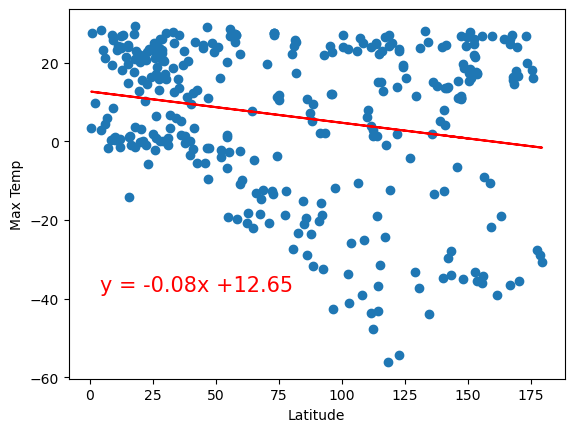

In [16]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp", (4,-38))

The r-value is: 0.05031576637090183
y = 0.08x +20.13


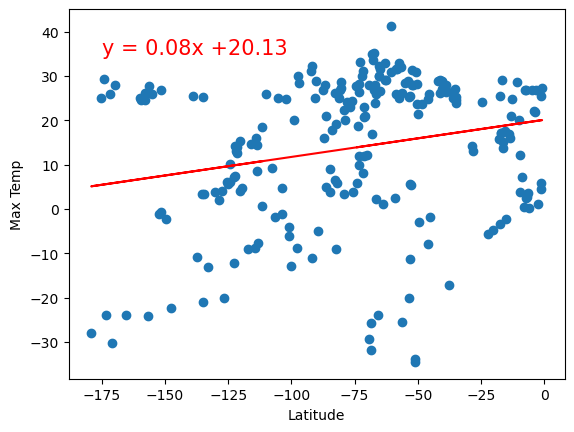

In [17]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Max Temp", (-175, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.053999471606684286
y = 0.09x +69.24


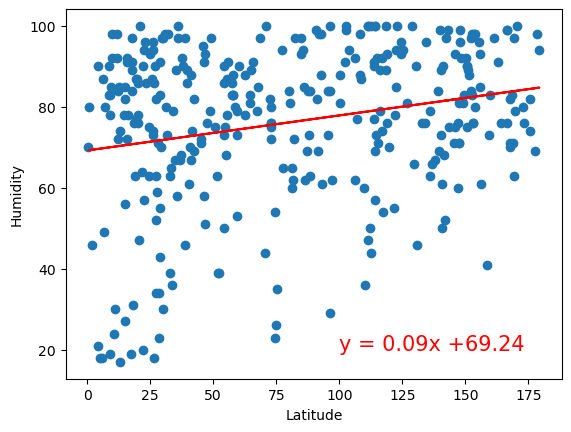

In [18]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity", (100, 20))

The r-value is: 0.050943108136547774
y = -0.1x +61.57


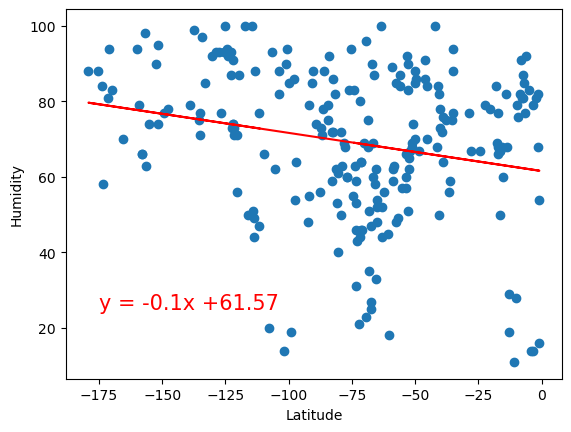

In [24]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity", (-175, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008916750288603524
y = 0.07x +54.88


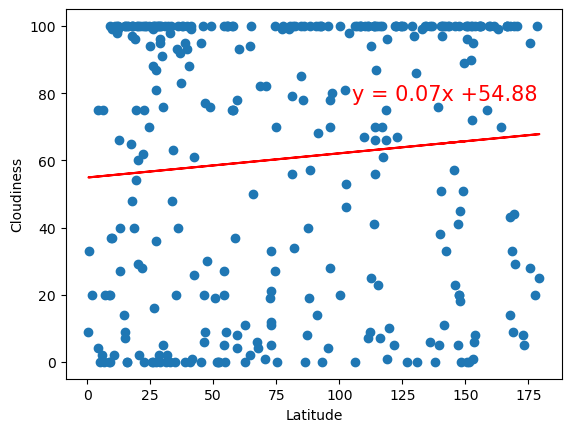

In [27]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness", (105, 78))

The r-value is: 0.001977919423500425
y = -0.04x +56.98


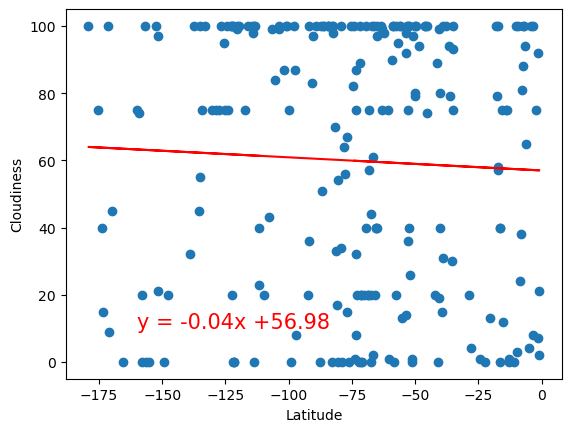

In [33]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness", (-160, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0007255766437342457
y = -0.0x +3.83


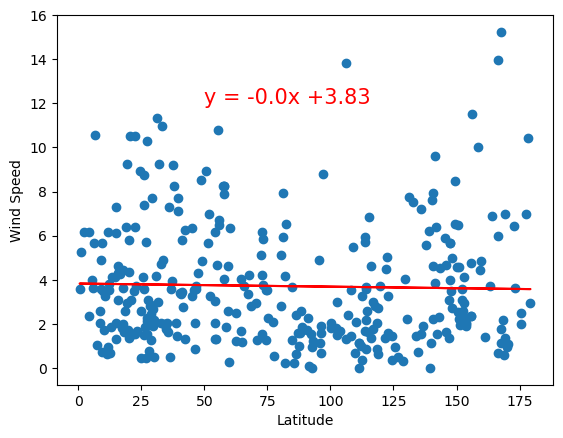

In [34]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed", (50, 12))

The r-value is: 0.056072945290341014
y = 0.01x +5.26


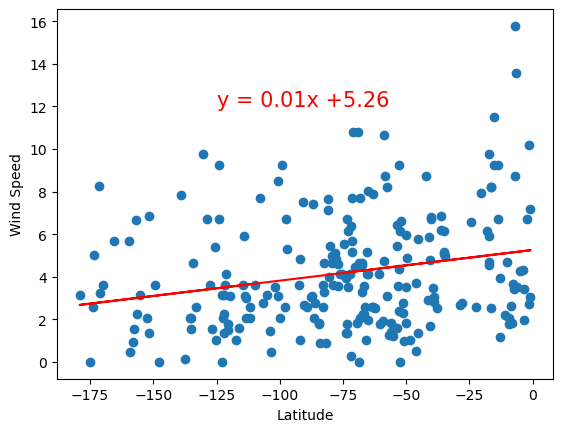

In [23]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", (-125, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE